# Histogram
It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import rcParams

### 1. Histogram Calculation in OpenCV ->
cv2.calcHist() function is used in OpenCV to find Histogram.<br><br>
**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**<br><br>

**images :** it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.<br>
**channels :** it is also given in square brackets. It the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.<br>
**mask :** mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)<br>
**histSize :** this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].<br>
**ranges :** this is our RANGE. Normally, it is [0,256].

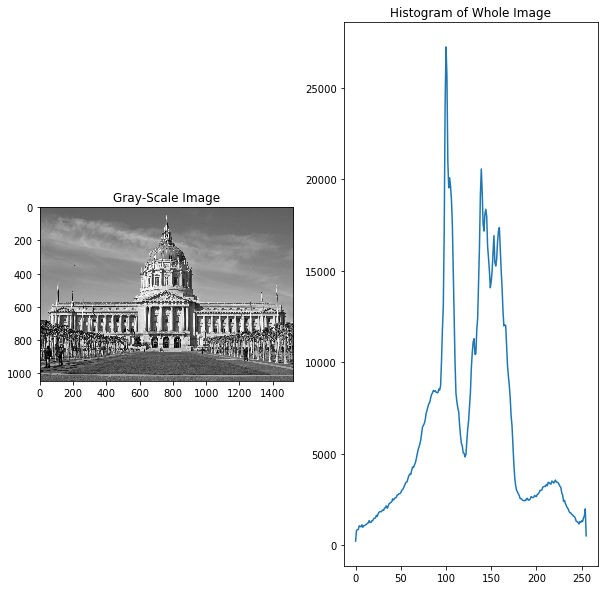

In [2]:
image = cv2.imread("Images/city_hall.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist(images=[gray], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(gray, cmap="gray")
ax1.set_title("Gray-Scale Image")

ax2.plot(hist)
ax2.set_title("Histogram of Whole Image")
plt.show()

Plotting 3 Channels in Red, Green & Blue Colors

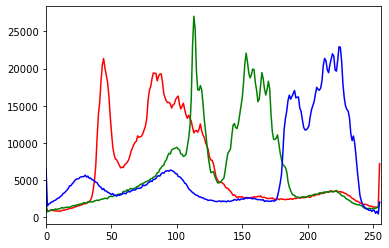

In [3]:
image = cv2.imread("Images/city_hall.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

color = ("r", "g", "b")
for i,col in enumerate(color):
    hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[256], ranges=[0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

### 2. Calculating & Plotting with Matplotlib Library

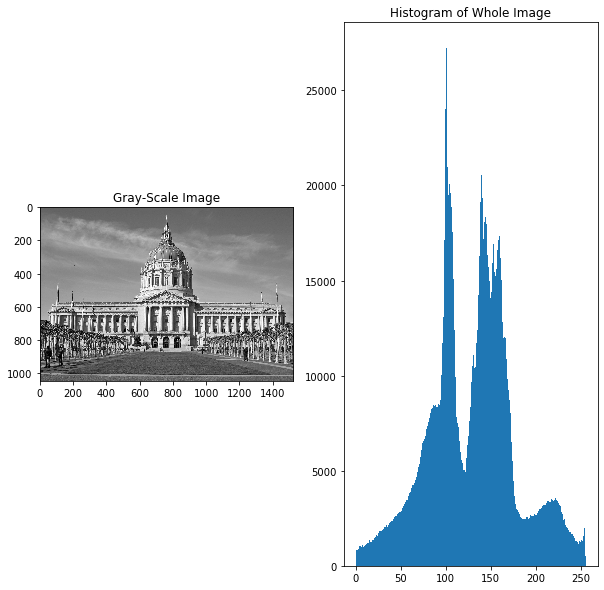

In [4]:
image = cv2.imread("Images/city_hall.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(gray, cmap="gray")
ax1.set_title("Gray-Scale Image")

ax2.hist(x=gray.ravel(),bins=256,range=[0,256])
ax2.set_title("Histogram of Whole Image")
plt.show()

## Application Of Mask

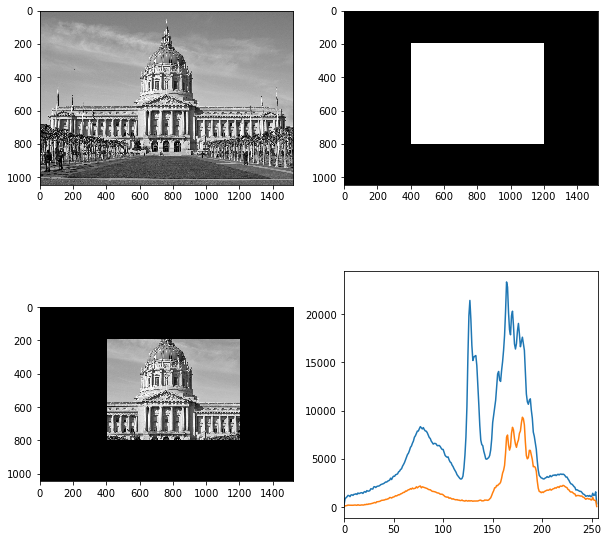

In [5]:
image = cv2.imread("Images/city_hall.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a Mask
mask = np.zeros(image.shape[:2], np.uint8)
mask[200:800, 400:1200] = 255

# Getting foreground on black background
gray_copy = gray.copy()
gray_copy[mask != 255] = 0
masked_img = gray_copy

# Calculating Histogram with & without mask
hist_full = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_masked = cv2.calcHist([gray], [0], mask, [256], [0, 256])

f, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0,0].imshow(gray, 'gray')

ax[0,1].imshow(mask, cmap='gray')

ax[1,0].imshow(masked_img, 'gray')

ax[1,1].plot(hist_full)
ax[1,1].plot(hist_masked)

plt.xlim([0,256])

plt.show()

In above case **Blue** line Histogram is showing the Whole Image Histogram & the one in **Orange** is showing the Masked Image Histogram.

## Global Histograms Equalization (GHE)
Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does. This normally improves the contrast of the image.
![title](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/histogram_equalization.png "Header")

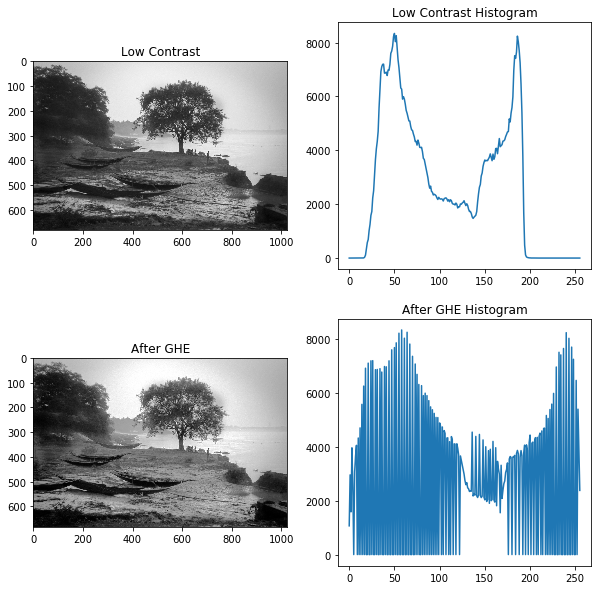

In [6]:
image = cv2.imread("Images/Low_Contrast.jpg", 0)
image_hist = cv2.calcHist([image], [0], None, [256], [0,256])
equalized_image = cv2.equalizeHist(image)
equalized_image_hist = cv2.calcHist([equalized_image], [0], None, [256], [0,256])

f, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0,0].imshow(image, 'gray')
ax[0,0].set_title("Low Contrast")

ax[0,1].plot(image_hist)
ax[0,1].set_title("Low Contrast Histogram")

ax[1,0].imshow(equalized_image, 'gray')
ax[1,0].set_title("After GHE")

ax[1,1].plot(equalized_image_hist)
ax[1,1].set_title("After GHE Histogram")

plt.show()

Histogram equalization is good when histogram of the image is confined to a particular region. It won’t work good in places where there is large intensity variations where histogram covers a large region, ie both bright and dark pixels are present.

## CLAHE (Contrast Limited Adaptive Histogram Equalization)
The first histogram equalization we just saw, considers the global contrast of the image. In many cases, it is not a good idea. For example, see original image & image after Global Histogram Equalization in below cell :-

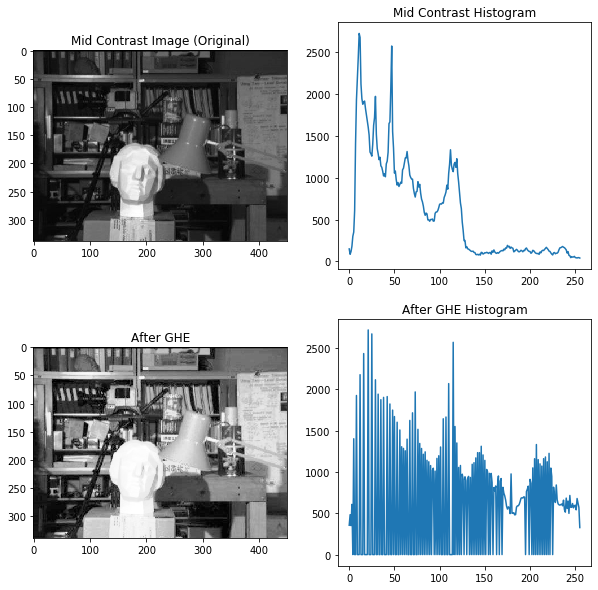

In [7]:
image = cv2.imread("Images/Mid_Contrast.jpg", 0)
image_hist = cv2.calcHist([image], [0], None, [256], [0,256])
equalized_image = cv2.equalizeHist(image)
equalized_image_hist = cv2.calcHist([equalized_image], [0], None, [256], [0,256])

f, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0,0].imshow(image, 'gray')
ax[0,0].set_title("Mid Contrast Image (Original)")

ax[0,1].plot(image_hist)
ax[0,1].set_title("Mid Contrast Histogram")

ax[1,0].imshow(equalized_image, 'gray')
ax[1,0].set_title("After GHE")

ax[1,1].plot(equalized_image_hist)
ax[1,1].set_title("After GHE Histogram")

plt.show()

It is true that the background contrast has improved after histogram equalization. But compare the face of statue in both images. We lost most of the information there due to over-brightness. It is because its histogram is not confined to a particular region as we saw in previous cases.<br><br>
So to solve this problem, **adaptive histogram equalization** is used. In this, image is divided into small blocks called “tiles” (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

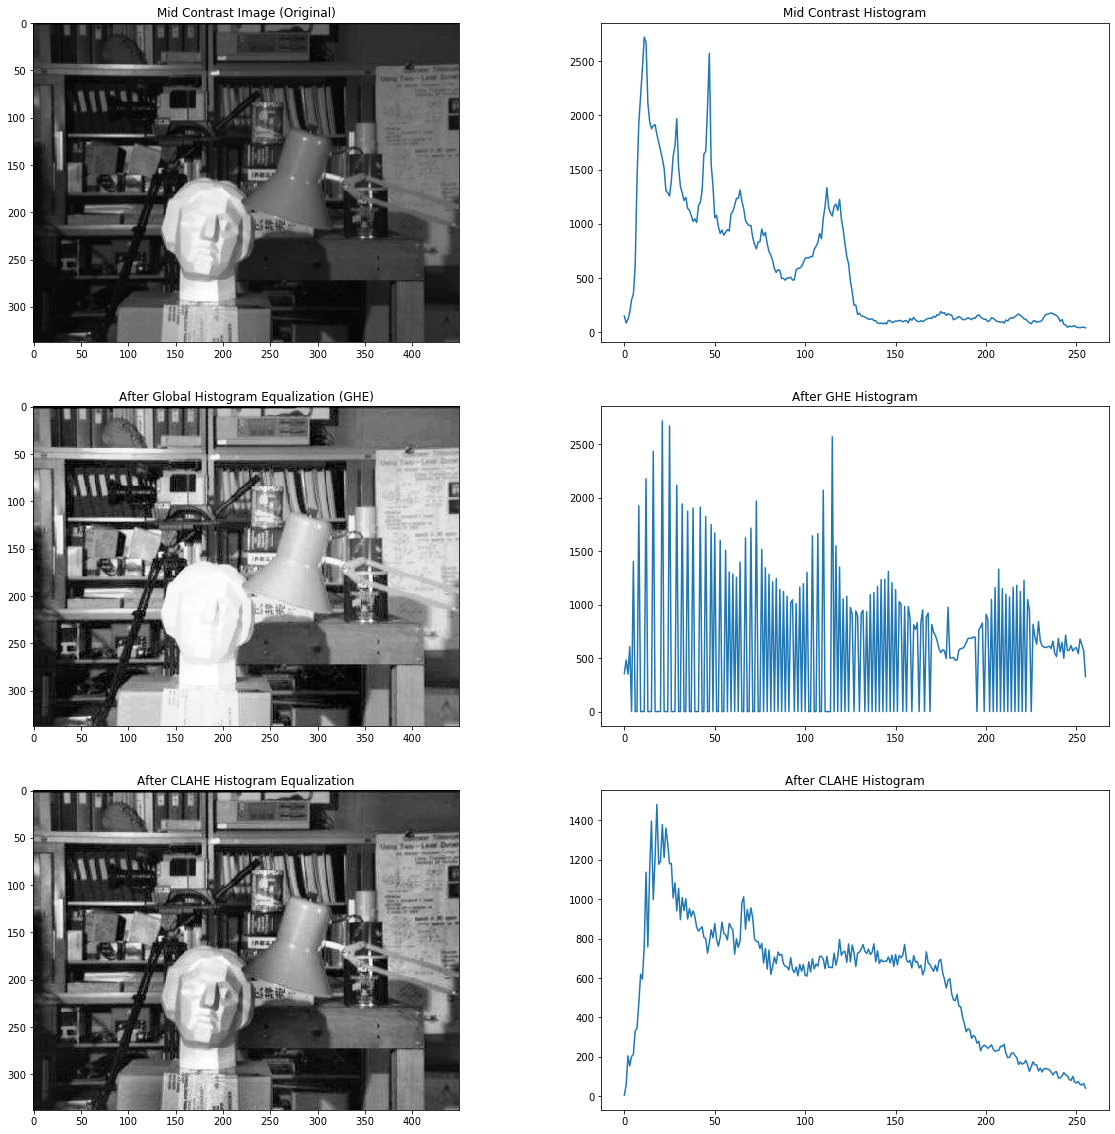

In [8]:
image = cv2.imread("Images/Mid_Contrast.jpg", 0)
image_hist = cv2.calcHist([image], [0], None, [256], [0,256])
equalized_image = cv2.equalizeHist(image)
equalized_image_hist = cv2.calcHist([equalized_image], [0], None, [256], [0,256])

# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_equalized_image = clahe.apply(image)
clahe_image_hist = cv2.calcHist([clahe_equalized_image], [0], None, [256], [0,256])

f, ax = plt.subplots(3, 2, figsize=(20,20))

ax[0,0].imshow(image, 'gray')
ax[0,0].set_title("Mid Contrast Image (Original)")

ax[0,1].plot(image_hist)
ax[0,1].set_title("Mid Contrast Histogram")

ax[1,0].imshow(equalized_image, 'gray')
ax[1,0].set_title("After Global Histogram Equalization (GHE)")

ax[1,1].plot(equalized_image_hist)
ax[1,1].set_title("After GHE Histogram")

ax[2,0].imshow(clahe_equalized_image, cmap="gray")
ax[2,0].set_title("After CLAHE Histogram Equalization")

ax[2,1].plot(clahe_image_hist)
ax[2,1].set_title("After CLAHE Histogram")

plt.show()

So, this can be seen that CLAHE Histogram Equalization Method is better than Global Histogram Equalization in cases when the histogram is already having large intensity (or can say is already widely spread).